# _Feature Engineering for Text Representation_
* Data
    1. Building a Text Corpus
    2. Preprocessing Our Text Corpus
* Traditional Feature Engineering Models
    1. Bag of Words Model
    2. Bag of N-Grams Model
    3. TF-IDF Model
    4. Extracting Features for New Documents
    5. Document Similarity
    6. Topic Models

# Intro
* all machine learning and deep learning models are limited because they cannot understand raw text data directly; they only understand numeric representations of features as inputs
* have to understand how to work with text data - most abundant sources of unstructured data
* text data: documents that represent words, sentences or paragraphs of free flowing text
* inherent lack of structure and noisy nature of textual data makes it harder for ML methods to directly work with raw text data
* need methods and strategies to extract meaningful features from text data
* feature engineering is important for unstructured, textual data cause need to convert free-flowing text into some numeric representation that can be understood by ML algorithms
* covered following techniques:
    1. Bag of Words model
    2. Bag of N-Grams model
    3. TF-IDF model
    4. Similarity features
    5. Topic models
    6. Word2Vec
    7. GloVe
    8. FastText

# Understanding Text Data
* text data can be structured, categorical attributes
* this scenario, we're talking about free-flowing text in form of words, phrases, sentences and entire document
* no inherent structure to text documents because there's a wide variety of words that can vary across documents and each sentence will be of variable length as compared to a fixed umber of data dimension in structured dataset
* how can we represent text data for machines to understand? use a _vector space model_: (i.e term vector model) mathematical and algebraic model for transforming and representing text documents as numeric vectors of specific terms that form the vector dimensions
* mathematically: let $D$ represent a document in vector space $VS$; the number of dimensions or columns for each document will be the total number of distinct terms or words for all documents in the vector space $VS = \{W_1, W_2, \dots, W_n\}$ where there are $n$ distinct words across all documents. Now represent document $D$ in this vector space as follows: $D = \{w_{D1}, w_{D2}, \dots, w_{Dn}\}$ where $W_{Dn}$ denotes weight for word $n$ in document $D$
* weight is a numeric value and can be anything ranging from frequency of word in document, the average frequency of occurence, embedding weights, or even TF-IDF weight
* important point: once we build feature engineering model, need to use the same process when extracting features from new documents to be predicted and not rebuild whole algorithm based on new documents


# Data

## Preprocessing Our Text Corpus
* highlighting most important cleaning and preprocessing techniques that are used heavily in NLP
    1. Removing tags: HTML tags not necessary, use BeautifulSoup library to remove them
    2. Removing accented characters: convert characcters and standardize into ASCII characters
    3. Expanding contradictions
    4. Removing special characters: non alphanumeric characters
    5. Stemming and lemmatization: two processes to get to the base of the word
    6. Removing stopwords
* others from ch3 include tokenization, removing extra whitespace, text lowercasing, spelling corrections, grammatical error corrections, removing repeated characters, etc.


In [5]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import handmade.pickle_jar as pj

pd.options.display.max_colwidth = 200
%matplotlib inline

In [7]:
# use pickle_jar to build text corpus
corpus_df = pj.corpus_df
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages, and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


In [8]:
# use pickle_jar to preprocess data
norm_corpus = pj.norm_corpus
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

# Traditional Feature Engineering Models
* traditional (count-based) feature engineering strategies for textual data belong to a family of models popularly known as the Bag of Words model, includes
    1. term frequencies
    2. TF-IDF (term frequency-inverse document frequency)
    3. N-grams
    4. topic models, etc.
* while they're effective methods for extracting features from text, due to inherent nature of the mode being a bag of unstructured words, also lose additional information such as semantics, structure, sequence, and context around words in each text document


## Bag of Words Model
* simplest vector space rep model for unstructured text
* vector space model: a math model to represent unstructured text (or any other data) as numeric vectors such that each dimension of the vector is a specific feature/attribute
* bag of words: represents each text doc as a numeric vector where each dimension is a specific word from the corpus and the value could be its frequency in the doc, occurence (denoted by 1 or 0), or even weighted values
* model's name comes from each document being represented as a literal bag of its own words; disregards word order, sequences, and grammar

FUNCTIONS
from sklearn.feature_extractions.text
* CountVectorizer(): convert a collection of text documents to a matrix of token counts
    1. parameters:
        - min_df: when building a vocabulary, ignore terms w/ document frequency strictly lower than freq threshold
        - max_df: when building a vocabulary, ignore terms w/ document frequency strictly higher than freq threshold
        - ngram_range: the lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted
    2. attributes
        - fit_transform(): learn the vocabulary dictionary and return document-term matrix
        - get_feature_names(): array mapping from feature integer indices to feature name
* np.vectorize(): transform functions which are not numpy-aware (e.g. take floats as input and return floats as output) into functions that can operate on (and return) numpy arrays (from stack overflow)
    1. parameters:
        - pyfunc: a python function or method (required)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)

# view non-zero feature positions in the sparse matrix
print(cv_matrix)

(0, 17)	1
  (0, 3)	1
  (0, 2)	1
  (1, 17)	1
  (1, 3)	1
  (1, 2)	1
  (1, 14)	1
  (2, 15)	1
  (2, 5)	1
  (2, 8)	1
  (2, 11)	1
  (2, 13)	1
  (2, 6)	1
  (3, 12)	1
  (3, 4)	1
  (3, 16)	1
  (3, 10)	1
  (3, 0)	1
  (3, 7)	1
  (3, 18)	1
  (3, 1)	1
  (4, 14)	1
  (4, 16)	1
  (4, 10)	1
  (4, 0)	1
  (4, 7)	1
  (4, 9)	1
  (5, 3)	1
  (5, 15)	1
  (5, 5)	1
  (5, 8)	1
  (5, 13)	1
  (5, 6)	1
  (6, 17)	2
  (6, 3)	1
  (6, 2)	1
  (6, 19)	1
  (7, 15)	1
  (7, 5)	1
  (7, 8)	1
  (7, 13)	1
  (7, 6)	1


In [10]:
# view output in dense matrix representation
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

In [11]:
# get all unique words in the corpus
vocab = cv.get_feature_names()

# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


## Bag of N-Grams Model
* helps to take into account phrases or collection of words that occur in sequence
* def: a collection of word tokens from a text doc such that these tokens are contiguous and occur in sequence
* extension of the BOW model that leverages N-gram based features
* each feature is a n-gram representing a sequence of n words and values represent how many times the n-gram was present in the document

In [13]:
# can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,dog lazy,eggs ham,...,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF Model

In [14]:
# Using TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer

tt = TfidfTransformer(norm='l2', use_idf=True)
tt_matrix = tt.fit_transform(cv_matrix)

tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names()
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


In [15]:
# Using TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2', use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


## Understanding the TF-IDF Model

In [16]:
# get unique words as feature names
unique_words = list(set([word for doc in [doc.split() for doc in norm_corpus] for word in doc]))
def_feature_dict = {w: 0 for w in unique_words}
print('Feature Names:', unique_words)
print('\nDefault Feature Dict:', def_feature_dict)

Feature Names: ['jumps', 'eggs', 'sausages', 'sky', 'lazy', 'blue', 'dog', 'ham', 'bacon', 'brown', 'toast', 'quick', 'beans', 'love', 'green', 'beautiful', 'kings', 'breakfast', 'fox', 'today']

Default Feature Dict: {'jumps': 0, 'eggs': 0, 'sausages': 0, 'sky': 0, 'lazy': 0, 'blue': 0, 'dog': 0, 'ham': 0, 'bacon': 0, 'brown': 0, 'toast': 0, 'quick': 0, 'beans': 0, 'love': 0, 'green': 0, 'beautiful': 0, 'kings': 0, 'breakfast': 0, 'fox': 0, 'today': 0}


In [17]:
from collections import Counter
# build bag of words features for each document - term frequencies
bow_features = []
for doc in norm_corpus:
    bow_feature_doc = Counter(doc.split())
    all_features = Counter(def_feature_dict)
    bow_feature_doc.update(all_features)
    bow_features.append(bow_feature_doc)

bow_features = pd.DataFrame(bow_features)
bow_features

,sky,blue,beautiful,jumps,eggs,sausages,lazy,dog,ham,bacon,brown,toast,quick,beans,love,green,kings,breakfast,fox,today
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0
3,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0
4,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0
5,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0
6,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0


In [18]:
import scipy.sparse as sp
feature_names = list(bow_features.columns)

# build the document frequency matrix
df = np.diff(sp.csc_matrix(bow_features, copy=True).indptr)
df = 1 + df # adding 1 to smooth idf alter

# show smoothened document frequencies
pd.DataFrame([df], columns=feature_names)

,sky,blue,beautiful,jumps,eggs,sausages,lazy,dog,ham,bacon,brown,toast,quick,beans,love,green,kings,breakfast,fox,today
0,4,5,4,2,3,3,4,4,3,3,4,2,4,2,3,2,2,2,4,2


In [19]:
# compute inverse document frequencies
total_docs = 1 + len(norm_corpus)
idf = 1.0 + np.log(float(total_docs) / df)

# show smoothened idfs
pd.DataFrame([np.round(idf, 2)], columns=feature_names)

,sky,blue,beautiful,jumps,eggs,sausages,lazy,dog,ham,bacon,brown,toast,quick,beans,love,green,kings,breakfast,fox,today
0,1.81,1.59,1.81,2.5,2.1,2.1,1.81,1.81,2.1,2.1,1.81,2.5,1.81,2.5,2.1,2.5,2.5,2.5,1.81,2.5


In [20]:
# compute idf diagonal matrix
total_features = bow_features.shape[1]
idf_diag = sp.spdiags(idf, diags=0, m=total_features, n=total_features)
idf_dense = idf_diag.todense()

# print the idf diagonal matrix
pd.DataFrame(np.round(idf_dense, 2))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.81,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,0.00,1.59,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,0.00,0.00,1.81,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,0.00,0.00,0.00,2.5,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,0.00,0.00,0.00,0.0,2.1,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0
5,0.00,0.00,0.00,0.0,0.0,2.1,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0
6,0.00,0.00,0.00,0.0,0.0,0.0,1.81,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0
7,0.00,0.00,0.00,0.0,0.0,0.0,0.00,1.81,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0
8,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,2.1,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0
9,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,2.1,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0


In [21]:
# compute tfidf feature matrix
tf = np.array(bow_features, dtype='float64')
tfidf = tf * idf
# view raw tfidf feature matrix
pd.DataFrame(np.round(tfidf, 2), columns=feature_names)

,sky,blue,beautiful,jumps,eggs,sausages,lazy,dog,ham,bacon,brown,toast,quick,beans,love,green,kings,breakfast,fox,today
0,1.81,1.59,1.81,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,1.81,1.59,1.81,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,2.1,0.0,0.0,0.0,0.00,0.0
2,0.00,0.00,0.00,2.5,0.0,0.0,1.81,1.81,0.0,0.0,1.81,0.0,1.81,0.0,0.0,0.0,0.0,0.0,1.81,0.0
3,0.00,0.00,0.00,0.0,2.1,2.1,0.00,0.00,2.1,2.1,0.00,2.5,0.00,2.5,0.0,0.0,2.5,2.5,0.00,0.0
4,0.00,0.00,0.00,0.0,2.1,2.1,0.00,0.00,2.1,2.1,0.00,0.0,0.00,0.0,2.1,2.5,0.0,0.0,0.00,0.0
5,0.00,1.59,0.00,0.0,0.0,0.0,1.81,1.81,0.0,0.0,1.81,0.0,1.81,0.0,0.0,0.0,0.0,0.0,1.81,0.0
6,3.62,1.59,1.81,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,2.5
7,0.00,0.00,0.00,0.0,0.0,0.0,1.81,1.81,0.0,0.0,1.81,0.0,1.81,0.0,0.0,0.0,0.0,0.0,1.81,0.0


In [22]:
from numpy.linalg import norm
# compute L2 norm
norms = norm(tfidf, axis=1)

# print norms for each document
print(np.round(norms,3))

[3.013 3.672 4.761 6.534 5.319 4.35  5.019 4.049]


In [23]:
# compute normalized tfidf
norm_tfidf = tfidf/norms[:, None]

# show final tfidf feature matrix
pd.DataFrame(np.round(norm_tfidf, 2), columns=feature_names)

,sky,blue,beautiful,jumps,eggs,sausages,lazy,dog,ham,bacon,brown,toast,quick,beans,love,green,kings,breakfast,fox,today
0,0.60,0.53,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,0.49,0.43,0.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.00,0.00,0.0
2,0.00,0.00,0.00,0.53,0.00,0.00,0.38,0.38,0.00,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.00,0.00,0.38,0.0
3,0.00,0.00,0.00,0.00,0.32,0.32,0.00,0.00,0.32,0.32,0.00,0.38,0.00,0.38,0.00,0.00,0.38,0.38,0.00,0.0
4,0.00,0.00,0.00,0.00,0.39,0.39,0.00,0.00,0.39,0.39,0.00,0.00,0.00,0.00,0.39,0.47,0.00,0.00,0.00,0.0
5,0.00,0.37,0.00,0.00,0.00,0.00,0.42,0.42,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.00,0.42,0.0
6,0.72,0.32,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.00,0.45,0.0


## Extracting Features for New Documents
* Suppose you built a machine learning model to classify and categorize news articles
* Q: How can you generate features for completely new document so that you can feed it into the ML models for prediction?
* sklearn has transform() function for vectorizers previously discussed
* can leverage to get features for completely new document that was not present in our corpus (when we trained model) 

PROCESS
    1. use fit_transform() to build a feature matrix on all documents in corpus
        * becomes training feature set on which to build and train predictive or other ML models
    2. use transform() to generate feature vectors of new documents
    3. can be fed into trained models to generate needed insights

In [24]:
new_doc = 'the sky is green today'
pd.DataFrame(np.round(tv.transform([new_doc]).toarray(), 2), columns=tv.get_feature_names())

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.46,0.0,0.63


## Document Similarity
* process of using a distance or similarity based metric that can identify how similar a text document is to any other document(s) based on features extracted from the documents like Bag of Words or TF-IDF
* pairwise document similarity: computing document similarity for each pair of documents in a corpus
* good EX of grouping or clustering that's solved by unsupervised learning

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


### Document Clustering with Similarity Features
* clustering leverages unsupervised learning to group data points (documents in this case) into groups or cluster
* leverage unsupervised hierarchical clustering algorithm to try and group similar documents from corpus by using document similarity features generated
* two types of hierarchical clustering algorithm
    1. agglomerative
        - hierarchical clustering using a bottom-up approach i.e each observation or document starts in its own cluser and clusters are successively merged using a distance metric that measures distances between data points and a linkage merge criterion
        - EX of linkage critera: Ward, Complete linkage, Average linkage; useful for choosing a pair of clusters (individual documents at lowest step and clusters at higher steps) to merge at each step based on optimal value of an objective function
        - can choose Ward's minimum variance method as linkage criteion to minimize total within-cluster variance; at each step, find the pair of clusters that leads to the minimum increase in total within-cluster variance after merging
    2. divisive
* with n data points, the linkage matrix z will have shape (n-1) x 4 where z[i] tells us which clusters were merged at step i
* each row has four elements
    - first two elements are either data point identifiers or cluster labels (in later parts of matrix once multiple data points are merged)
    - third element: cluster distance between first two elements (either data points or clusters)
    - last element: total number of elements/data points in cluster once merge is complete

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,2,7,0.253098,2
1,0,6,0.308539,2
2,5,8,0.386952,3
3,1,9,0.489845,3
4,3,4,0.732945,2
5,11,12,2.69565,5
6,10,13,3.45108,8


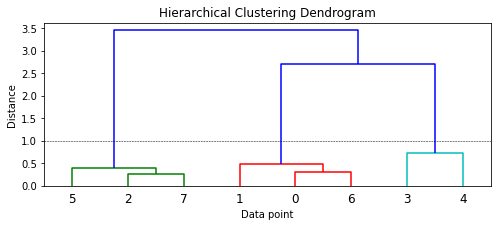

In [28]:
plt.figure(figsize=(8,3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [29]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,3
4,"I love green eggs, ham, sausages, and bacon!",food,3
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


## Topic Models
* use some summarization techniques to extract topic or concept based features from text doc
* extract key themes or concepts from a corpus of docs represented as topics
* each topic represented as a collection of words or terms from doc corpus
* together terms signify a specific topic, theme, or concept and each topic can be easily distinguished from other topics by virtue of semantic meaning conveyed by these terms
* do end up with overlapping topics based on data
* topic models useful in summarizing large corpus of text docs to extract and depict key concepts
* also useful in extracting features from text data that capture latent patterns in the data
* various techniques for topic modeling, but most involve a form of matrix decomposition
    - EXs
        1. Latent Semantic Indexing (LSI): uses Singular Valued Decomposition
        2. Latent Dirichlet Allocation (LDA): uses generative probabilistic model where each document consists of a combination of several topics and each term or word can be assigned to a specific topic;
* after running algorithm for several iterations, should have topic mixtures for each document
* then generate constituents of each topic from terms that point to that topic
* remember when LDA is applied to a document-term matrix (TF-IDF or BOW feature matrix), it's broken down into two main components:
    1. document topic matrix: feature matrix we're looking for
    2. topic-term matrix: helps us look at potential topics in the corpus

In [30]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, max_iter=10000, random_state=0)
dt_matrix = lda.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3'])
features

,T1,T2,T3
0,0.832191,0.083480,0.084329
1,0.863554,0.069100,0.067346
2,0.047794,0.047776,0.904430
3,0.037243,0.925559,0.037198
4,0.049121,0.903076,0.047802
5,0.054902,0.047778,0.897321
6,0.888287,0.055697,0.056016
7,0.055704,0.055689,0.888607


In [31]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()

[('sky', 4.332439442470133), ('blue', 3.373774254787669), ('beautiful', 3.3323650509884386), ('today', 1.3325579855138987), ('love', 1.330415818217548)]

[('bacon', 2.33269586574902), ('eggs', 2.33269586574902), ('ham', 2.33269586574902), ('sausages', 2.33269586574902), ('love', 1.3354610533796558), ('beans', 1.3327735190105536), ('breakfast', 1.3327735190105536), ('kings', 1.3327735190105536), ('toast', 1.3327735190105536), ('green', 1.3325431515674175)]

[('brown', 3.3323473548404405), ('dog', 3.3323473548404405), ('fox', 3.3323473548404405), ('lazy', 3.3323473548404405), ('quick', 3.3323473548404405), ('jumps', 1.3324193772908193), ('blue', 1.2919423137963386)]

